In [21]:
import numpy as np
from scipy.stats import norm, cauchy
import matplotlib.pyplot as plt

In [59]:
S = 1_000
X1 = norm.rvs(loc=0, scale=1, size=S)
X2 = norm.rvs(loc=0, scale=1, size=S)
Y = X1 / X2

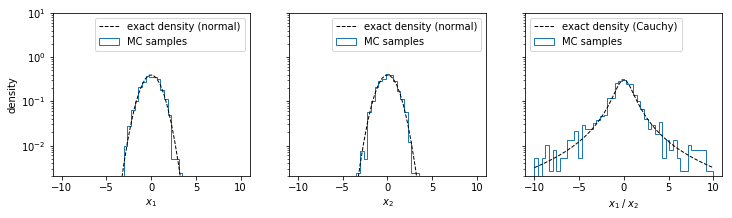

In [62]:
bins = np.linspace(-10, 10, 50)
fig, axes = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
ax = axes[0]
ax.hist(X1, bins=bins, density=True, label='MC samples', histtype='step')
ax.plot(bins, norm.pdf(bins, loc=0, scale=1), 'k--', lw=1, label='exact density (normal)')
ax.set_xlabel('$x_1$')
ax.set_ylabel('density')
ax.legend()

ax = axes[1]
ax.hist(X2, bins=bins, density=True, label='MC samples', histtype='step')
ax.plot(bins, norm.pdf(bins, loc=0, scale=1), 'k--', lw=1, label='exact density (normal)')
ax.set_xlabel('$x_2$')
ax.legend()

ax = axes[2]
ax.hist(Y, bins=bins, density=True, label='MC samples', histtype='step')
ax.plot(bins, cauchy.pdf(bins, loc=0, scale=1), 'k--', lw=1, label='exact density (Cauchy)')
ax.set_xlabel('$x_1\;/\;x_2$')
ax.legend(loc=2)

plt.yscale('log')
plt.ylim([None, 10])

plt.savefig('./07-Cauchy.pdf', bbox_inches='tight')

plt.show()

In [63]:
import numpy as np
from scipy.stats import dirichlet

In [79]:
import numpy as np
from scipy.stats import dirichlet

def entropy(p):
    h = 0
    for pk in p:
        if pk > 0:
            h += - pk * np.log2(pk)
    return h


h_samples_list = []
for sample_size in 10**np.array([3,4,5,6]):
    alpha = (1,1,1)

    p_samples = dirichlet.rvs(alpha, size=sample_size)

    h_samples = []    
    for p in p_samples:
        h_samples.append(entropy(p))
    h_samples_list.append(h_samples)

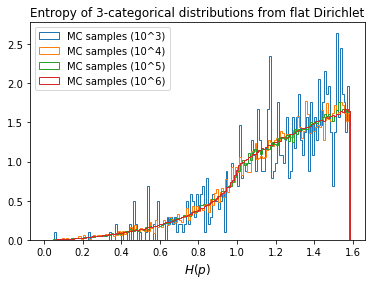

In [93]:
plt.figure(figsize=(6,4))
for idx, sample_size in enumerate(10**np.array([3,4,5,6])):
    plt.hist(h_samples_list[idx], bins=150, density=True, histtype='step',
                 label='MC samples (10^' + str(int(np.log10(sample_size))) + ')')

plt.xlabel('$H(p)$', fontsize=12)
plt.legend(loc=2)
plt.title('Entropy of 3-categorical distributions from flat Dirichlet')
plt.savefig('07-entropy.pdf', bbox_inches='tight')
plt.show()

In [121]:
from numpy.random import choice

doors = {1, 2, 3}

games = 1000
wins_with_switch = 0
wins_with_no_switch = 0
for g in range(games):
    reward = choice(list(doors))
    pick_1 = choice(list(doors))
    can_open = doors - set([pick_1]).union(set([reward]))
    openned = choice(list(can_open))
    remaining = doors - set([openned])
    
    pick_2 = pick_1
    if pick_2 == reward:
        wins_with_no_switch += 1
    
    pick_2 = list(remaining - set([pick_1]))[0]
    if pick_2 == reward:
        wins_with_switch += 1
        
P_win_with_switch = wins_with_switch / float(games)
P_win_with_no_switch = wins_with_no_switch / float(games)

In [122]:
P_win_with_switch, P_win_with_no_switch

(0.653, 0.347)

In [97]:
choice?

In [100]:
np.array(list(doors))

array([1, 2, 3])

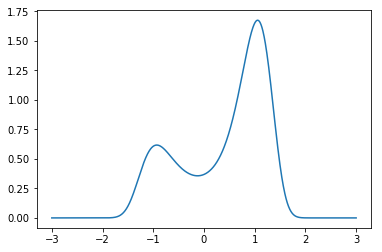

In [144]:
x_draw = np.linspace(-3,3, 1000)
plt.plot(x_draw, np.exp(log_Pstar(x_draw)))


In [146]:
def propose_MH(x, stepsize):
    epsilon = norm.rvs(loc=0, scale=stepsize)
    return x + epsilon

def new_sample_MH(x_current, x_proposed, log_Pstar):
    delta_L = log_Pstar(x_proposed) - log_Pstar(x_current)
    if delta_L >= 0:
        return x_proposed
    if np.random.random() < np.exp(delta_L):
        return x_proposed
    else:
        return x_current

In [188]:
def propose_MH(x, stepsize):
    epsilon = norm.rvs(loc=0, scale=stepsize)
    return x + epsilon

def new_sample_MH(x_current, x_proposed, log_Pstar):
    delta_L = log_Pstar(x_proposed) - log_Pstar(x_current)
    if delta_L >= 0:
        return x_proposed
    if np.random.random() < np.exp(delta_L):
        return x_proposed
    else:
        return x_current

def log_Pstar_camel(x):
    return -(1 - x**2)**2 + 0.5 * x

x0 = 0
stepsize = 0.1
iterations = 20000
x_samples = []

x_curr = x0
for it in range(iterations):
    x_proposed = propose_MH(x_curr, stepsize)
    x = new_sample_MH(x_curr, x_proposed, log_Pstar_camel)
    x_samples.append(x)
    x_curr = x

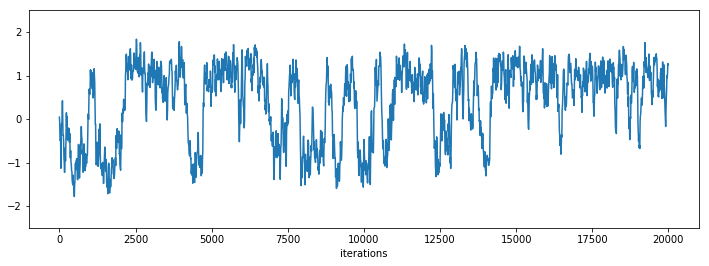

In [201]:
plt.figure(figsize=(12,4))
thin = 10
plt.plot(range(iterations)[::thin], x_samples[::thin], '-')
plt.ylim([-2.5,2.5])
plt.xlabel('iterations')
plt.savefig('./07-camel_2.pdf', bbox_inches='tight')
plt.show()

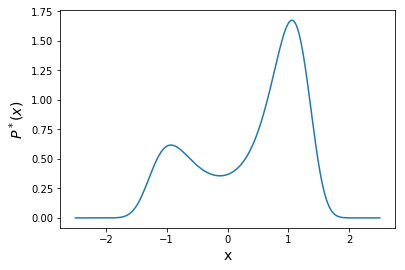

In [200]:
x_draw = np.linspace(-2.5,2.5, 1000)
plt.plot(x_draw, np.exp(log_Pstar_camel(x_draw)))
plt.xlabel('x', fontsize=14)
plt.ylabel('$P^*(x)$', fontsize=14)

plt.savefig('./07-camel_1.pdf', bbox_inches='tight')
plt.show()

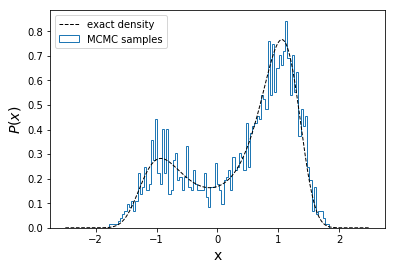

In [196]:
x_draw = np.linspace(-2.5,2.5, 1000)
thin = 10
plt.hist(x_samples[::thin], bins=100, density=True, histtype='step', label='MCMC samples')
plt.plot(x_draw, np.exp(log_Pstar_camel(x_draw))/ np.sum(np.exp(log_Pstar_camel(x_draw))) / (x_draw[1] - x_draw[0]), 
         'k--', lw=1, label='exact density') 
plt.xlabel('x', fontsize=14)
plt.ylabel('$P(x)$', fontsize=14)
plt.legend()

plt.savefig('./07-camel_3.pdf', bbox_inches='tight')
plt.show()

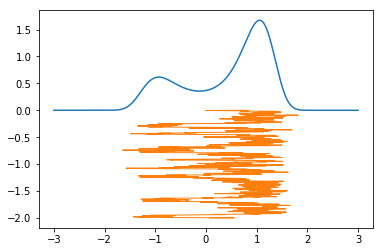

In [170]:
thin = 10

x_draw = np.linspace(-3,3, 1000)
plt.plot(x_draw, np.exp(log_Pstar_camel(x_draw)))
samples_to_show = x_samples[::thin]
plt.plot(samples_to_show, np.linspace(-2, 0, len(samples_to_show)), '-', lw=1)
plt.show()